In [1]:
import plotly_express as px
import pandas as pd
import numpy as np
import plotly.graph_objs as go

import matplotlib.pyplot as plt
import datashader as ds
import colorcet as cc
import folium

%matplotlib inline
plt.style.use('ggplot')

In [2]:
pickups = pd.read_csv("Required Data\\2014 EDA\\Combined Data.csv")

In [3]:
dailyRides = pickups.query(
    'Day == 26 and Month == "July"' 
)

dailyRides = dailyRides['Hour'].value_counts().sort_index()

labels = {
    "index": "Hours",
    "value": "Number of Rides"
}

byHourFigure = px.bar(dailyRides, labels=labels)

In [26]:
l1 = [int(x) for x in range(0, 24)]

l2 = [1245,940,677,509,376,330,368,496,647,804,986,1069,1132,1179,1377,1657,1725,1642,1814,1560,1755,1840,1854,1726]

dr = pd.DataFrame(list(zip(l1, l2)))

In [27]:
dr.columns = ['Hour', 'Number of Pickups']

In [28]:
dr

,Hour,Number of Pickups
0,0,1245
1,1,940
2,2,677
3,3,509
4,4,376
5,5,330
6,6,368
7,7,496
8,8,647
9,9,804


In [25]:
dailyRides

0     1245
1      940
2      677
3      509
4      376
5      330
6      368
7      496
8      647
9      804
10     986
11    1069
12    1132
13    1179
14    1377
15    1657
16    1725
17    1642
18    1814
19    1560
20    1755
21    1840
22    1854
23    1726
Name: Hour, dtype: int64

In [5]:
byHourFigure

In [5]:
# Bar chart for hourly rides

dailyRides = pickups.query(
    'Day == 26 and Month == "July"' 
)

dailyRides = dailyRides.groupby(['Hour']).sum()

labels = {
    "x": "Hours",
    "Day": "Number of Rides"
}

byHourFigure = px.bar(dailyRides, x=[x for x in range(24)], y="Day", labels=labels)

# byHourFigure.show()

In [7]:
month_map = {
    4: 'April',
    5: 'May',
    6: 'June', 
    7: 'July',
    8: 'August',
    9: 'September'
}

In [31]:
daily_pickups

Month      Day
April      1      14546
           2      17474
           3      20701
           4      26714
           5      19521
                  ...  
September  26     37504
           27     39468
           28     29656
           29     29201
           30     33431
Name: Hour, Length: 183, dtype: int64

Text(0.5, 1.0, 'Daily Pickups')

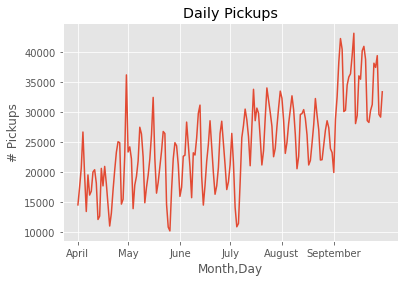

In [9]:
daily_pickups = pickups.groupby(['Month', 'Day'])['Hour'].count()[month_map.values()]  # type: ignore
daily_pickups.plot(kind='line', rot=0)
month_starts = np.where(daily_pickups.reset_index(level=0, drop=True).index.get_loc(1))[0]
plt.xticks(ticks=month_starts, labels=month_map.values())  # type: ignore
plt.ylabel('# Pickups')
plt.title('Daily Pickups')

Number of Pickups: 4500872


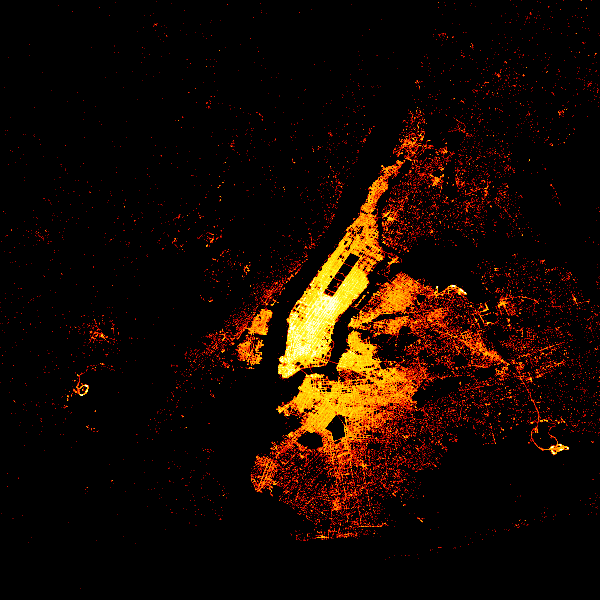

In [29]:
pickups_focused = pickups[
    pickups['Lon'].between(-74.25, -73.75) & 
    pickups['Lat'].between(40.5, 41)
]
print('Number of Pickups: {}'.format(len(pickups_focused)))

pickup_points = ds.Canvas().points(pickups_focused, 'Lon', 'Lat', )
ds.tf.set_background(ds.tf.shade(pickup_points, cmap=cc.fire), "black")

In [30]:
pickups_focused

,Base,Lat,Lon,Month,Day,Weekday,Hour
0,B02512,40.7690,-73.9549,April,1,Tuesday,0
1,B02512,40.7267,-74.0345,April,1,Tuesday,0
2,B02512,40.7316,-73.9873,April,1,Tuesday,0
3,B02512,40.7588,-73.9776,April,1,Tuesday,0
4,B02512,40.7594,-73.9722,April,1,Tuesday,0
...,...,...,...,...,...,...,...
4534322,B02764,40.7668,-73.9845,September,30,Tuesday,22
4534323,B02764,40.6911,-74.1773,September,30,Tuesday,22
4534324,B02764,40.8519,-73.9319,September,30,Tuesday,22
4534325,B02764,40.7081,-74.0066,September,30,Tuesday,22
